In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
netflix_df = pd.read_csv('/content/netflix.csv')

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix_df.isnull().values.any()

True

In [ ]:
netflix_df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
netflix_df['director']=netflix_df['director'].fillna('Director not specified')
netflix_df['cast']=netflix_df['cast'].fillna('No cast specified')
netflix_df['country']=netflix_df['country'].fillna('No country specified')

In [ ]:
# Basic data cleaning
df2 = netflix_df  # Remove rows with missing values
df2 = df2.dropna()

In [ ]:
df2['release_year'] = pd.to_datetime(df2['release_year'], format='%Y')  # Convert release_year to datetime

<ipython-input-97-6d6439e0626d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,datetime64[ns]
rating,object
duration,object


In [ ]:
df2.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df2.shape

(8790, 12)

In [ ]:
rating_counts = df2['rating'].value_counts()
print(rating_counts)

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


In [ ]:
df2['date_added'] = pd.to_datetime(df2['date_added'], errors='coerce')
df2['date_added'].head()

<ipython-input-102-ef20fbdeb036>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24


<ipython-input-103-dad742481485>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-103-dad742481485>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



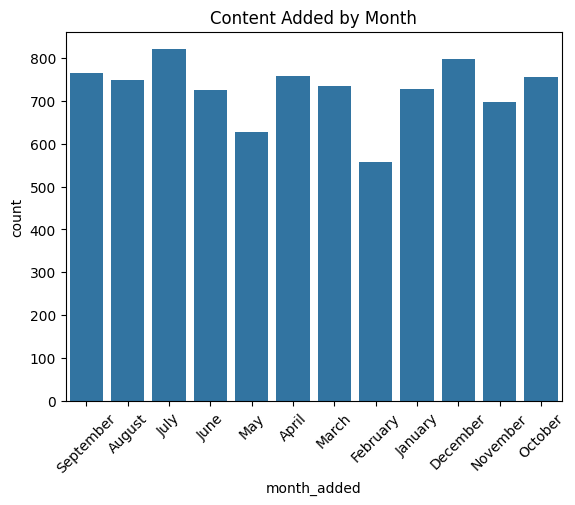

<Figure size 1200x600 with 0 Axes>

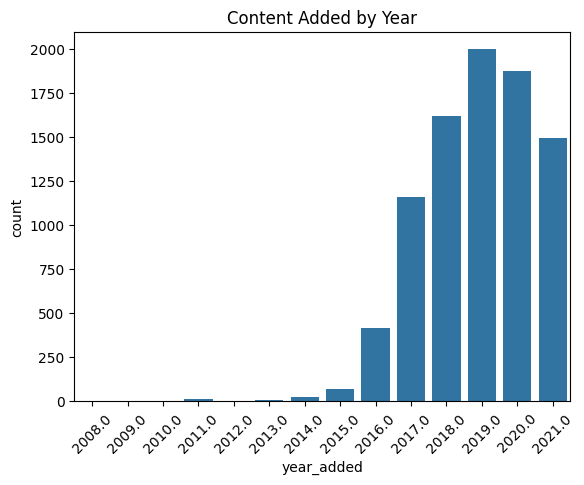

<Figure size 1200x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month and year
df2['month_added'] = df2['date_added'].dt.month_name()  # Extract month name
df2['year_added'] = df2['date_added'].dt.year

# Month distribution
sns.countplot(x='month_added', data=df2)
plt.title('Content Added by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.figure(figsize=(12, 6))
plt.show()

# Year distribution
sns.countplot(x='year_added', data=df2)
plt.title('Content Added by Year')
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))
plt.show()

In [ ]:
import plotly.express as px

rating_counts = df2['rating'].value_counts()
fig = px.pie(rating_counts, values=rating_counts.values, names=rating_counts.index,
             title='Distribution of Content Ratings')
fig.show()

In [ ]:
genre_counts = df2['listed_in'].str.split(', ').explode().value_counts()
px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values, labels={'x':'Genre', 'y':'Count'}, title='Distribution of Genres')

In [ ]:
# Count of movies/TV shows by year
df_count_by_year = df2.groupby('release_year')['show_id'].count().reset_index(name='count')

fig = px.line(df_count_by_year, x='release_year', y='count', title='Content Count Over Time')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import plotly.express as px
import pandas as pd

# Filter movies only
movies = df2[df2['type'] == 'Movie']

# Group by release year and count show_id
df_count_by_year_movies = movies.groupby('release_year')['show_id'].count().reset_index(name='count')
df_count_by_year_movies['type'] = 'Movies'  # Add a column to distinguish the type

# Filter TV shows only
tv_shows = df2[df2['type'] == 'TV Show']

# Group by release year and count show_id
df_count_by_year_tv_shows = tv_shows.groupby('release_year')['show_id'].count().reset_index(name='count')
df_count_by_year_tv_shows['type'] = 'TV Shows'  # Add a column to distinguish the type

# Combine both dataframes
df_combined = pd.concat([df_count_by_year_movies, df_count_by_year_tv_shows])

# Create a line chart with Plotly Express
fig = px.line(df_combined,
              x='release_year',
              y='count',
              color='type',
              title='Movies and TV Shows Count Over Time',
              color_discrete_map={'Movies': 'blue', 'TV Shows': 'red'})

# Show the figure
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
# Country wise count of content
country_counts = df2['country'].str.split(', ').explode().value_counts()
px.bar(country_counts, x=country_counts.index, y=country_counts.values, labels={'x':'Country', 'y':'Count'}, title='Content Count by Country')

In [ ]:
# Split the 'director' column, explode it, and count the occurrences
director_counts = df2['director'].str.split(', ').explode().value_counts()

# Filter out "Director not specified"
director_counts = director_counts[director_counts.index != 'Director not specified']

# Get the top 10 directors after filtering
top_10_directors = director_counts.head(10)

# Display the top 10 directors
print(top_10_directors)

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: count, dtype: int64


In [ ]:
import plotly.express as px

# Create a bar chart with Plotly Express
fig = px.bar(top_10_directors,
             x=top_10_directors.index,
             y=top_10_directors.values,
             labels={'x': 'Director', 'y': 'Count'},
             title='Top 10 Directors on Netflix')

# Update x-axis label for better readability
fig.update_layout(xaxis_title='Director', yaxis_title='Count')

# Show the figure
fig.show()

In [ ]:
# Split the 'cast' column, explode it, and count the occurrences
actor_counts = df2['cast'].str.split(', ').explode().value_counts()

# Filter out "No cast specified"
actor_counts = actor_counts[actor_counts.index != 'No cast specified']

# Get the top 5 actors after filtering
top_5_actors = actor_counts.head(5)

# Display the top 5 actors
print(top_5_actors)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Name: count, dtype: int64


In [ ]:
import plotly.express as px

# Create a pie chart with Plotly Express
fig = px.pie(top_5_actors,
             values=top_5_actors.values,
             names=top_5_actors.index,
             title='Top 5 Actors on Netflix')

# Show the figure
fig.show()

In [ ]:
df2.to_csv('Netflix_Cleaned.csv', index=False)

In [ ]:
df2.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021.0
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country specified,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,No country specified,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021.0
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No country specified,2021-09-24,2021-01-01,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,2021.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No country specified,2021-09-24,2021-01-01,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,2021.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021-01-01,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,September,2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021-01-01,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,September,2021.0
